<h2>Importing modules required for running the code</h2>

In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,Flatten
from keras.layers import BatchNormalization


Using TensorFlow backend.
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

<h2>Columns Name for our testing and training data </h2>

In [2]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

<h2> Training Dataset </h2>

In [3]:
awid = pd.read_csv("AWID-CLS-R-Trn", header=None, names=features)

C:\Users\Naresh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2> Data Exploration</h2>

In [4]:
awid.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal


In [5]:
awid.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,radiotap.datarate,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order
count,1795575.0,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0,1795575.0,...,1.795575e+06,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0
mean,0.0,0.0,1.393663e+09,2.004690e-03,2.004690e-03,1.870294e+03,5.153149e+02,5.153149e+02,0.0,0.0,...,2.513950e+01,0.0,1.272582e+00,8.499055e+00,3.748103e-04,1.271080e-01,2.325216e-02,1.772691e-03,4.932927e-01,0.0
std,0.0,0.0,8.674448e+02,6.379536e-03,6.379536e-03,8.674448e+02,6.649245e+02,6.649245e+02,0.0,0.0,...,2.373590e+01,0.0,8.198060e-01,4.173015e+00,1.935639e-02,3.330940e-01,1.507034e-01,4.206602e-02,4.999551e-01,0.0
min,0.0,0.0,1.393661e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.0,1.393662e+09,3.150000e-04,3.150000e-04,1.027875e+03,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.0,0.0,1.393663e+09,5.490000e-04,5.490000e-04,1.902614e+03,1.120000e+02,1.120000e+02,0.0,0.0,...,2.400000e+01,0.0,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.0,0.0,1.393664e+09,1.113000e-03,1.113000e-03,2.524325e+03,1.552000e+03,1.552000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
max,0.0,0.0,1.393665e+09,3.502630e-01,3.502630e-01,3.599571e+03,1.570000e+03,1.570000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [6]:
awid['class'].value_counts()

normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: class, dtype: int64

In [7]:
awid.isna().sum()

frame.interface_id               0
frame.dlt                        0
frame.offset_shift               0
frame.time_epoch                 0
frame.time_delta                 0
                                ..
wlan.qos.bit4                    0
wlan.qos.txop_dur_req            0
wlan.qos.buf_state_indicated2    0
data.len                         0
class                            0
Length: 155, dtype: int64

<h2> Dropping columns with 50% of null data</h2>

In [8]:
awid.replace({"?":None}, inplace=True)
null_column=awid.columns[awid.isnull().mean() >= 0.51]
null_column.shape

(70,)

<h2>Dropping all the null rows</h2>

In [9]:
awid.drop(null_column, axis=1, inplace=True)
awid.dropna(inplace=True)

In [10]:
awid.isna().sum()

frame.interface_id            0
frame.offset_shift            0
frame.time_epoch              0
frame.time_delta              0
frame.time_delta_displayed    0
                             ..
wlan.seq                      0
wlan.fcs_good                 0
wlan.wep.key                  0
data.len                      0
class                         0
Length: 85, dtype: int64

In [11]:
awid['class'].value_counts()

normal           775634
injection         65379
impersonation     44731
Name: class, dtype: int64

<h2>Converting all the Columns to numeric</h2>

In [12]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')

In [13]:
awid.select_dtypes(['number']).head()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
17,0,0.0,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,0,0,...,0,0,1,0,44,0,96,1,0,1460
18,0,0.0,1.393661e+09,0.000621,0.000621,0.218139,124,124,0,0,...,0,0,1,0,44,0,1217,1,0,60
20,0,0.0,1.393661e+09,0.000144,0.000144,0.229118,153,153,0,0,...,0,0,1,0,44,0,97,1,0,89
28,0,0.0,1.393661e+09,0.021711,0.021711,0.367359,124,124,0,0,...,0,0,1,0,44,0,1220,1,0,60
31,0,0.0,1.393661e+09,0.000058,0.000058,0.380933,124,124,0,0,...,0,0,1,0,44,0,99,1,0,60


<h2>Splitting the training data</h2>

In [14]:
X_train, y_train = awid.select_dtypes(['number']), awid['class']


In [15]:
y_train.value_counts()

normal           775634
injection         65379
impersonation     44731
Name: class, dtype: int64

<h2>Removing all the Constant of training data</h2>

In [16]:
zero_mean=X_train.columns[X_train.mean() <= 1]
X_train.drop(zero_mean, axis=1, inplace=True, errors='ignore')
X_train.shape

C:\Users\Naresh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(885744, 13)

In [17]:
X_train.describe()

,frame.time_epoch,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.seq,data.len
count,8.857440e+05,885744.000000,885744.000000,885744.000000,885744.0,8.857440e+05,885744.000000,885744.000000,885744.000000,885744.000000,885744.000000,885744.000000,885744.000000
mean,1.393663e+09,1804.671067,967.176877,967.176877,26.0,3.906253e+09,42.140876,2437.008022,1.999688,5.973751,60.130699,1909.654222,903.683868
std,8.321081e+02,832.108077,699.334423,699.334423,0.0,8.320998e+08,20.953351,0.535839,0.024962,3.479865,75.964734,1213.594220,698.842577
min,1.393661e+09,0.217518,65.000000,65.000000,26.0,2.101817e+09,1.000000,2412.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.393662e+09,961.030476,124.000000,124.000000,26.0,3.062621e+09,48.000000,2437.000000,2.000000,0.000000,44.000000,798.000000,60.000000
50%,1.393663e+09,1929.983103,1552.000000,1552.000000,26.0,4.031564e+09,54.000000,2437.000000,2.000000,8.000000,44.000000,1862.000000,1488.000000
75%,1.393664e+09,2206.561865,1554.000000,1554.000000,26.0,4.308140e+09,54.000000,2437.000000,2.000000,8.000000,44.000000,2957.000000,1490.000000
max,1.393665e+09,3599.425846,1570.000000,1570.000000,26.0,5.700990e+09,54.000000,2472.000000,2.000000,11.000000,314.000000,4095.000000,1508.000000


<h2>Testing Data</h2>

In [18]:
awid_test = pd.read_csv("AWID-CLS-R-Tst/AWID-CLS-R-Tst", header=None, names=features)


C:\Users\Naresh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2>Cleaning testing data</h2>

In [19]:
awid_test.isna().sum()
awid_test.replace({"?":None}, inplace=True)
test_null_column=awid_test.columns[awid_test.isnull().mean() >= 0.5]
awid_test.drop(test_null_column, axis=1, inplace=True)
awid_test.dropna(inplace=True)

for col in awid_test.columns:
    awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')


X_test, y_test = awid_test.select_dtypes(['number']), awid_test['class']

zero_mean=X_test.columns[X_test.mean() <= 1]
X_test.drop(zero_mean, axis=1, inplace=True, errors='ignore')

C:\Users\Naresh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
X_test.describe()

,frame.time_epoch,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.seq,data.len
count,3.132480e+05,313248.000000,313248.000000,313248.000000,313248.0,3.132480e+05,313248.000000,313248.000000,313248.000000,313248.000000,313248.000000,313248.000000,313248.000000
mean,1.393669e+09,419.131540,892.088681,892.088681,26.0,9.407048e+09,36.257678,2437.006544,1.999757,4.797611,80.225144,1849.670600,828.889611
std,3.968335e+02,396.833483,713.371196,713.371196,0.0,3.968294e+08,21.867087,0.563983,0.022027,3.920187,98.175003,1158.063441,712.901695
min,1.393668e+09,0.000000,65.000000,65.000000,26.0,8.987921e+09,1.000000,2412.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.393668e+09,74.256986,124.000000,124.000000,26.0,9.062177e+09,18.000000,2437.000000,2.000000,0.000000,44.000000,920.000000,60.000000
50%,1.393668e+09,255.078000,1552.000000,1552.000000,26.0,9.242996e+09,54.000000,2437.000000,2.000000,8.000000,44.000000,1646.000000,1488.000000
75%,1.393669e+09,852.944268,1552.000000,1552.000000,26.0,9.840856e+09,54.000000,2437.000000,2.000000,8.000000,44.000000,2812.000000,1488.000000
max,1.393669e+09,1200.289872,1570.000000,1570.000000,26.0,1.018820e+10,54.000000,2472.000000,2.000000,11.000000,314.000000,4095.000000,1508.000000


In [21]:
y_test.value_counts()

normal           277960
impersonation     18606
injection         16682
Name: class, dtype: int64

<h2>Preprocessing and Feature Scaling   </h2> 

In [22]:
sc=StandardScaler()
sc.fit(X_train)
scaled_X_train=sc.transform(X_train)

sc1=StandardScaler()
sc1.fit(X_test)
scaled_X_test=sc1.transform(X_test)

In [23]:
X_train

,frame.time_epoch,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.seq,data.len
17,1.393661e+09,0.217518,1524,1524,26,2101817362,54.0,2437,2,8,44,96,1460
18,1.393661e+09,0.218139,124,124,26,2101818213,54.0,2437,2,8,44,1217,60
20,1.393661e+09,0.229118,153,153,26,2101829175,54.0,2437,2,8,44,97,89
28,1.393661e+09,0.367359,124,124,26,2101967429,54.0,2437,2,8,44,1220,60
31,1.393661e+09,0.380933,124,124,26,2101981052,54.0,2437,2,8,44,99,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795504,1.393665e+09,3599.043342,112,112,26,5700607575,18.0,2437,2,8,48,2608,48
1795511,1.393665e+09,3599.086311,112,112,26,5700650521,18.0,2437,2,8,48,2609,48
1795551,1.393665e+09,3599.323495,1524,1524,26,5700887520,54.0,2437,2,8,44,0,1460
1795556,1.393665e+09,3599.375225,1523,1523,26,5700939250,54.0,2437,2,8,44,1,1459


In [24]:

print(X_train.dtypes)

frame.time_epoch         float64
frame.time_relative      float64
frame.len                  int64
frame.cap_len              int64
radiotap.length            int64
radiotap.mactime           int64
radiotap.datarate        float64
radiotap.channel.freq      int64
wlan.fc.type               int64
wlan.fc.subtype            int64
wlan.duration              int64
wlan.seq                   int64
data.len                   int64
dtype: object


In [25]:
print(scaled_X_train)
print(scaled_X_train.dtype)


[[-2.16853389 -2.16853389  0.79621912 ... -0.21234469 -1.49444948
   0.79605402]
 [-2.16853315 -2.16853315 -1.20568547 ... -0.21234469 -0.57074647
  -1.20725951]
 [-2.16851995 -2.16851995 -1.16421745 ... -0.21234469 -1.49362548
  -1.1657623 ]
 ...
 [ 2.15675522  2.15675522  0.79621912 ... -0.21234469 -1.57355339
   0.79605402]
 [ 2.15681739  2.15681739  0.79478919 ... -0.21234469 -1.57272939
   0.79462309]
 [ 2.15687822  2.15687823 -0.75382701 ... -0.21234469 -0.97285803
  -0.75508302]]
float64


<h2>Encoding the label data</h2>

In [26]:
encoder = LabelEncoder()
encoded_y=encoder.fit_transform(y_train)
enc_y_test=encoder.fit_transform(y_test)

In [27]:
encoder.classes_

array(['impersonation', 'injection', 'normal'], dtype=object)

In [28]:
enc_y_test

array([2, 2, 2, ..., 2, 2, 2])

<h2>Using Dense Neural Network (DNN) with Binary Classification </h2>

In [29]:
#Since it is not binary classification problem, 
#the fully connected neural network does not give us good accuracy and loss

model1 = Sequential()
model1.add(Dense(150, input_shape=(scaled_X_train.shape[1],), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(150, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])

model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               2100      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150)               600       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 26,101
Trainable params: 25,501
Non-trainable params: 600
_________________________________________________________________


In [30]:
hist1=model1.fit(scaled_X_train, encoded_y,validation_split=0.1, batch_size=512,epochs=5)


Instructions for updating:
Use tf.cast instead.
Train on 797169 samples, validate on 88575 samples
Epoch 1/5
797169/797169 [==============================] - 7s 8us/step - loss: -12.1146 - accuracy: 0.0560 - val_loss: -11.7296 - val_accuracy: 0.0000e+00
Epoch 2/5
797169/797169 [==============================] - 7s 9us/step - loss: -13.3088 - accuracy: 0.0934 - val_loss: -11.7615 - val_accuracy: 0.0000e+00
Epoch 3/5
797169/797169 [==============================] - 7s 9us/step - loss: -13.8352 - accuracy: 0.1261 - val_loss: -14.5906 - val_accuracy: 0.0820
Epoch 4/5
797169/797169 [==============================] - 7s 9us/step - loss: -13.8817 - accuracy: 0.1288 - val_loss: -14.4668 - val_accuracy: 0.0820
Epoch 5/5
797169/797169 [==============================] - 7s 9us/step - loss: -13.8804 - accuracy: 0.1288 - val_loss: -14.6146 - val_accuracy: 0.0820


In [31]:
model1_loss, model1_accuracy = model1.evaluate(scaled_X_test, enc_y_test)
model1_accuracy

313248/313248 [==============================] - 5s 15us/step


0.053254928439855576

In [32]:
print('Loss :{loss},\nAccuracy of DNN model1 : {accuracy}'.format(loss= model1_loss,accuracy=model1_accuracy))

Loss :-13.19694100132933,
Accuracy of DNN model1 : 0.053254928439855576


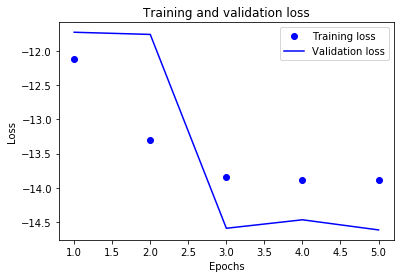

In [33]:
import matplotlib.pyplot as plt

acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

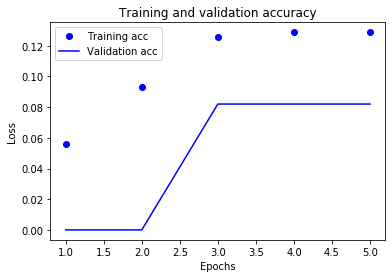

In [34]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Changing it to Categorical </h2>

In [35]:
cat_y_train=to_categorical(encoded_y)
cat_y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [36]:
cat_y_test=to_categorical(enc_y_test)
cat_y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

<h2>DNN for Multiclass Classification </h2>

In [37]:
#Neural Network(Multiclass/Categorical Crossentropy)
model2 = Sequential()
model2.add(Dense(5, input_shape=(scaled_X_train.shape[1],), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 70        
_________________________________________________________________
batch_normalization_3 (Batch (None, 5)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 183
Trainable params: 173
Non-trainable params: 10
_______________________________________________________

In [38]:
hist=model2.fit(scaled_X_train,cat_y_train,batch_size=512,validation_split=0.1,
               epochs=5, verbose=1)

Train on 797169 samples, validate on 88575 samples
Epoch 1/5
797169/797169 [==============================] - 3s 4us/step - loss: 0.2003 - accuracy: 0.9257 - val_loss: 0.3917 - val_accuracy: 0.9667
Epoch 2/5
797169/797169 [==============================] - 3s 4us/step - loss: 0.0670 - accuracy: 0.9743 - val_loss: 0.5167 - val_accuracy: 0.9671
Epoch 3/5
797169/797169 [==============================] - 3s 4us/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.5133 - val_accuracy: 0.9675
Epoch 4/5
797169/797169 [==============================] - 3s 3us/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.5098 - val_accuracy: 0.9676
Epoch 5/5
797169/797169 [==============================] - 3s 4us/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.5108 - val_accuracy: 0.9676


In [39]:
model2_loss, model2_accuracy = model2.evaluate(scaled_X_test,cat_y_test)

313248/313248 [==============================] - 4s 11us/step


In [40]:
print('Loss :{loss},\nAccuracy of DNN 2 : {accuracy}'.format(loss= model2_loss,accuracy=model2_accuracy))

Loss :0.46613795795017693,
Accuracy of DNN 2 : 0.9177328944206238


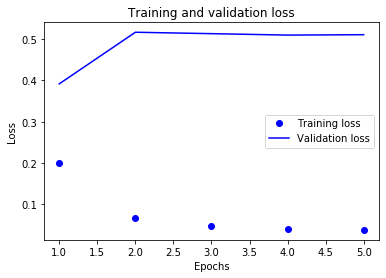

In [41]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

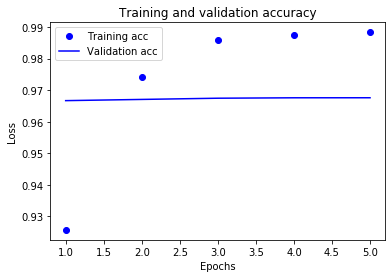

In [42]:
acc_values = hist.history['accuracy']
val_acc_values = hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Reshaping to the array to 3-Dimensional array  </h2>

In [43]:
#Reshape input to be [samples, time steps, features] to work with LSTM

third_X_train = numpy.reshape(scaled_X_train, (scaled_X_train.shape[0], 1, scaled_X_train.shape[1]))
third_X_train.shape

(885744, 1, 13)

In [44]:
third_X_test = numpy.reshape(scaled_X_test,(scaled_X_test.shape[0], 1, scaled_X_test.shape[1]))
third_X_test.shape

(313248, 1, 13)

<h2>Using Recurrent Neural Network with LSTM </h2>

In [45]:
#LSTM expect 3-Dimension array to be the input 
#Using just one layer of LSTM 
lstm_model=Sequential()

lstm_model.add(LSTM(5,input_shape=(1, third_X_train.shape[2]),
                    return_sequences=True, activation='relu'))
lstm_model.add(Flatten())

lstm_model.add(Dense(3, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 5)              380       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 18        
Total params: 398
Trainable params: 398
Non-trainable params: 0
_________________________________________________________________


<h2>Training and evaluating the model </h2>

In [46]:
history_lstm=lstm_model.fit(third_X_train, cat_y_train,batch_size=50,
               epochs=5, validation_split=0.1, verbose=1)

Train on 797169 samples, validate on 88575 samples
Epoch 1/5
797169/797169 [==============================] - 21s 27us/step - loss: 0.0267 - accuracy: 0.9930 - val_loss: 0.5664 - val_accuracy: 0.8381
Epoch 2/5
797169/797169 [==============================] - 21s 26us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1608 - val_accuracy: 0.9684
Epoch 3/5
797169/797169 [==============================] - 19s 24us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.2550 - val_accuracy: 0.9683
Epoch 4/5
797169/797169 [==============================] - 20s 25us/step - loss: 9.9112e-04 - accuracy: 0.9998 - val_loss: 0.2697 - val_accuracy: 0.9683
Epoch 5/5
797169/797169 [==============================] - 19s 24us/step - loss: 9.3115e-04 - accuracy: 0.9998 - val_loss: 0.2809 - val_accuracy: 0.9683


In [47]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(third_X_test, cat_y_test)

313248/313248 [==============================] - 4s 13us/step


In [48]:
print('Loss :{loss},\nAccuracy of LSTM Model : {accuracy}'.format(loss=lstm_loss,accuracy=lstm_accuracy))

Loss :1.0222967098767897,
Accuracy of LSTM Model : 0.9309620261192322


<h2> Plotting the Training/Validation Loss and Accuracy</h2>

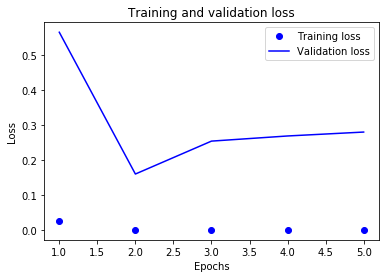

In [49]:
import matplotlib.pyplot as plt

acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

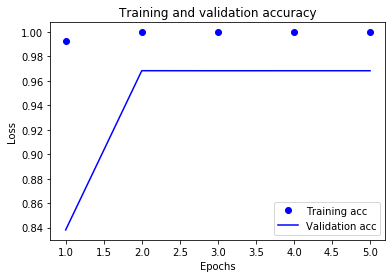

In [50]:
acc_values = history_lstm.history['accuracy']
val_acc_values = history_lstm.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Predicting the Model </h2>

In [51]:
preds=lstm_model.predict_classes(third_X_test)

In [52]:
transpose=numpy.transpose([enc_y_test, preds])

In [53]:
#Actual class is first element and Predicted Class is second element of and array
transpose

array([[2, 2],
       [2, 2],
       [2, 2],
       ...,
       [2, 2],
       [2, 2],
       [2, 2]], dtype=int64)

In [80]:
#From the below code we can observe the predicted and actual label
#we can range(len(en_y_test)), but for this time we are getting the labels
#for one thousands outcomes

for i in range(100):
    prediction = encoder.classes_[transpose[i,1]]
    actual = encoder.classes_[transpose[i,0]]
    print( "At line",i, "The model predicted :", prediction, ", When the Actual is :", actual)

At line 0 The model predicted : normal , When the Actual is : normal
At line 1 The model predicted : normal , When the Actual is : normal
At line 2 The model predicted : normal , When the Actual is : normal
At line 3 The model predicted : normal , When the Actual is : normal
At line 4 The model predicted : normal , When the Actual is : normal
At line 5 The model predicted : normal , When the Actual is : normal
At line 6 The model predicted : normal , When the Actual is : normal
At line 7 The model predicted : normal , When the Actual is : normal
At line 8 The model predicted : normal , When the Actual is : normal
At line 9 The model predicted : normal , When the Actual is : normal
At line 10 The model predicted : normal , When the Actual is : normal
At line 11 The model predicted : normal , When the Actual is : normal
At line 12 The model predicted : normal , When the Actual is : normal
At line 13 The model predicted : normal , When the Actual is : normal
At line 14 The model predicted

<h2>Precision/Recall and F1-score Report </h2>

In [55]:
encoder.classes_

array(['impersonation', 'injection', 'normal'], dtype=object)

In [56]:
target_names=[encoder.classes_[0], encoder.classes_[1], encoder.classes_[2]]

In [57]:
result_lstm = classification_report(enc_y_test, preds, target_names=target_names)

In [58]:
print(result_lstm)

               precision    recall  f1-score   support

impersonation       0.00      0.00      0.00     18606
    injection       1.00      0.82      0.90     16682
       normal       0.93      1.00      0.96    277960

     accuracy                           0.93    313248
    macro avg       0.64      0.61      0.62    313248
 weighted avg       0.88      0.93      0.90    313248



<h2>Using multiple layer of LSTM </h2>

In [69]:
#Using multiple layer of LSTM
multi_lstm_model=Sequential()

multi_lstm_model.add(LSTM(5,input_shape=(1, third_X_train.shape[2]),
                    return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(LSTM(10, return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(LSTM(15, return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(Flatten())

multi_lstm_model.add(Dense(3, activation='softmax'))

multi_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

multi_lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 5)              380       
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 5)              0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 10)             640       
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 15)             1560      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 15)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15)               

<h2>Training and evaluating the model with more layers </h2>

In [70]:
history_lstm1=multi_lstm_model.fit(third_X_train, cat_y_train,batch_size=128,
               epochs=5, validation_split=0.15, verbose=1)

Train on 752882 samples, validate on 132862 samples
Epoch 1/5
752882/752882 [==============================] - 20s 26us/step - loss: 0.1222 - accuracy: 0.9587 - val_loss: 0.3723 - val_accuracy: 0.9726
Epoch 2/5
752882/752882 [==============================] - 19s 26us/step - loss: 0.0615 - accuracy: 0.9787 - val_loss: 0.3597 - val_accuracy: 0.9773
Epoch 3/5
752882/752882 [==============================] - 19s 25us/step - loss: 0.0574 - accuracy: 0.9804 - val_loss: 0.3611 - val_accuracy: 0.9774
Epoch 4/5
752882/752882 [==============================] - 19s 25us/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.3551 - val_accuracy: 0.9779
Epoch 5/5
752882/752882 [==============================] - 19s 26us/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.3583 - val_accuracy: 0.9775


In [71]:
lstm1_loss, lstm1_accuracy = multi_lstm_model.evaluate(third_X_test, cat_y_test)

313248/313248 [==============================] - 8s 25us/step


In [72]:
print('Loss :{loss},\nAccuracy of LSTM Model : {accuracy}'.format(loss=lstm1_loss,accuracy=lstm1_accuracy))

Loss :0.9630307712523953,
Accuracy of LSTM Model : 0.883766233921051


<h2> Plotting the Training/Validation Loss and Accuracy of more LSTM layers</h2>

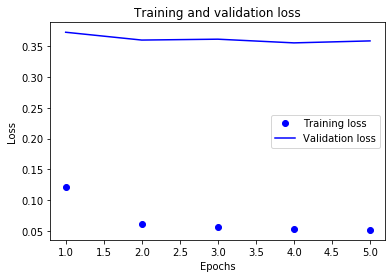

In [73]:
import matplotlib.pyplot as plt

acc = history_lstm1.history['accuracy']
val_acc = history_lstm1.history['val_accuracy']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

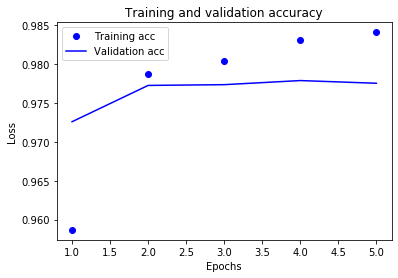

In [74]:
acc_values = history_lstm1.history['accuracy']
val_acc_values = history_lstm1.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Predicting the Model and Generating the Outcome </h2>

In [75]:
multi_lstm_preds=multi_lstm_model.predict_classes(third_X_test)

In [76]:
transpose=numpy.transpose([enc_y_test, multi_lstm_preds])

In [77]:
result_lstm1 = classification_report(enc_y_test, multi_lstm_preds, target_names=target_names)

In [78]:
print(result_lstm1)
#USING LSTM With more layer and neuron, we may get better result

               precision    recall  f1-score   support

impersonation       0.00      0.00      0.00     18606
    injection       0.19      0.36      0.25     16682
       normal       1.00      0.97      0.99    277960

     accuracy                           0.88    313248
    macro avg       0.40      0.44      0.41    313248
 weighted avg       0.90      0.88      0.89    313248

